In [2]:
import json
import os
import matplotlib.pyplot as plt
import re
import numpy as np
import pandas as pd

In [11]:
def visualize(task_name, max_budget):
    model_names = []
    accuracies_regular, accuracies_std_dev_regular = [], []
    output_tokens_regular, output_tokens_std_dev_regular = [], []
    
    accuracies_truncating, accuracies_std_dev_truncating = [], []
    output_tokens_truncating, output_tokens_std_dev_truncating = [], []
    
    for model in os.listdir(f"RegularHyperParams/{task_name}"):
        pattern = r"(?<=Qwen2\.5-)([\d.]+)(?=B-Instruct)"
        match = re.search(pattern, model)
        if match:
            model_name = match.group(0)
            model_names.append(model_name)
            
            results_json_regular = json.load(open(os.path.join("RegularHyperParams", task_name, model, "final_report.json")))
            accuracies_regular.append(results_json_regular[task_name]["accuracy"]["mean"])
            accuracies_std_dev_regular.append(results_json_regular[task_name]["accuracy"]["std"])
            output_tokens_regular.append(results_json_regular[task_name]["output_tokens"]["mean"])
            output_tokens_std_dev_regular.append(results_json_regular[task_name]["output_tokens"]["std"])
            
            results_json_truncating = json.load(open(os.path.join("TruncatingBasedOnTradeoff", task_name, model, "final_report.json")))
            accuracies_truncating.append(results_json_truncating[task_name]["accuracy"]["mean"])
            accuracies_std_dev_truncating.append(results_json_truncating[task_name]["accuracy"]["std"])
            output_tokens_truncating.append(results_json_truncating[task_name]["output_tokens"]["mean"])
            output_tokens_std_dev_truncating.append(results_json_truncating[task_name]["output_tokens"]["std"])

    # Convert model names to float for sorting, then zip and sort
    combined = list(zip(
        model_names, 
        accuracies_regular, accuracies_std_dev_regular, 
        output_tokens_regular, output_tokens_std_dev_regular,
        accuracies_truncating, accuracies_std_dev_truncating,
        output_tokens_truncating, output_tokens_std_dev_truncating
    ))

    combined_sorted = sorted(combined, key=lambda x: float(x[0]))  # sort by numeric model size
    
    # Unzip sorted values
    model_names_sorted, acc_reg, std_reg, output_reg,output_stddev_reg, acc_trunc, std_trunc, output_trunc,output_stddev_trunc, = zip(*combined_sorted)
    print(output_trunc)
    # Plotting
    fig, axs = plt.subplots(2, 2, figsize=(12, 6), sharex=True)

    axs[0,0].errorbar(model_names_sorted, acc_trunc, yerr=std_trunc, fmt='-o', capsize=5)
    axs[0,0].set_title(f'Accuracy for {task_name}\n with max tokens {max_budget}')
    axs[0,0].set_xlabel('Model Names')
    axs[0,0].set_ylabel('Accuracy')
    
    axs[0,1].errorbar(model_names_sorted, output_reg, yerr=output_stddev_reg, fmt='-o', capsize=5)
    axs[0,1].set_title(f'Output tokens for {task_name}\n with max tokens 1024')
    axs[0,1].set_xlabel('Model Names')
    axs[0,1].set_ylabel('Output tokens')
    
    axs[1,0].errorbar(model_names_sorted, acc_reg, yerr=std_reg, fmt='-o', capsize=5)
    axs[1,0].set_title(f'Accuracy for {task_name}\n with max tokens 1024')
    axs[1,0].set_xlabel('Model Names')
    axs[1,0].set_ylabel('Accuracy')

    axs[1,1].errorbar(model_names_sorted, output_trunc, yerr=output_stddev_trunc, fmt='-o', capsize=5)
    axs[1,1].set_title(f'Output tokens for {task_name}\n with max tokens 1024')
    axs[1,1].set_xlabel('Model Names')
    axs[1,1].set_ylabel('Output tokens')

    plt.tight_layout()
    plt.show()


(165.19, 101.62, 162.11, 167.26, 155.84, 160.81)


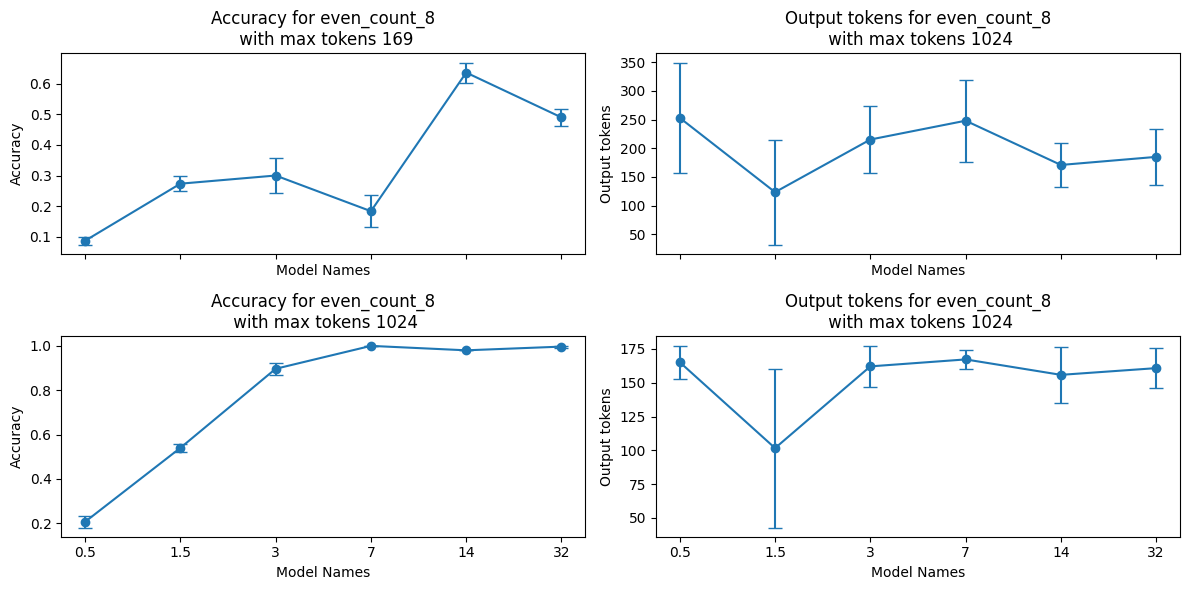

In [12]:
visualize("even_count_8",169)

(249.33, 204.53, 242.72, 246.77, 225.54, 240.87)


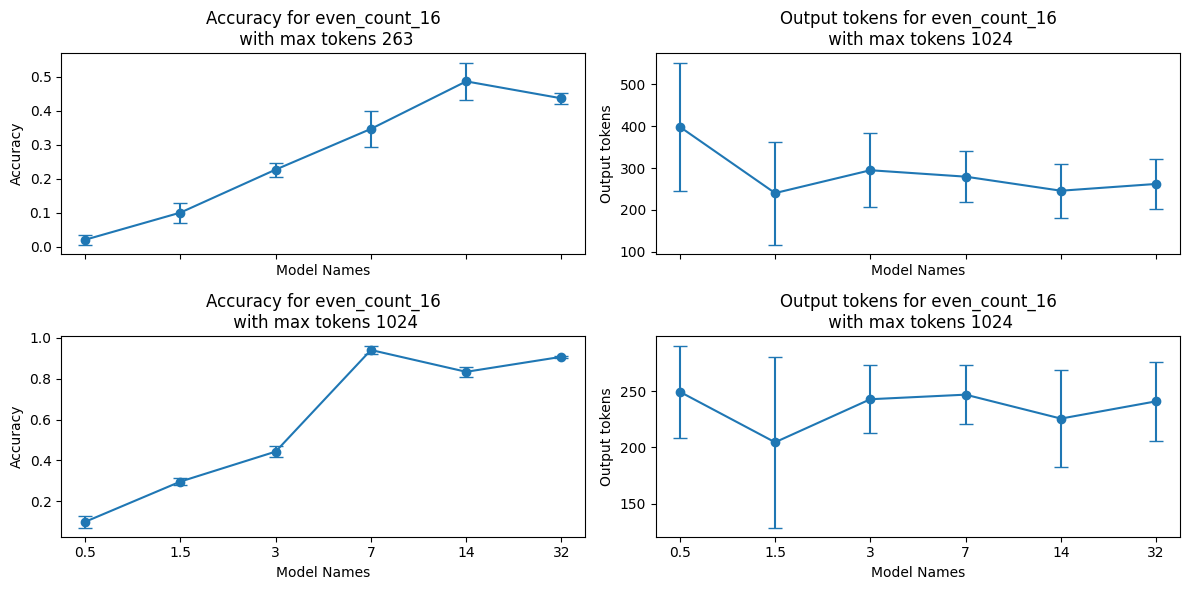

In [13]:
visualize("even_count_16",263)

(40.62, 18.45, 51.0, 51.0, 51.0, 51.0)


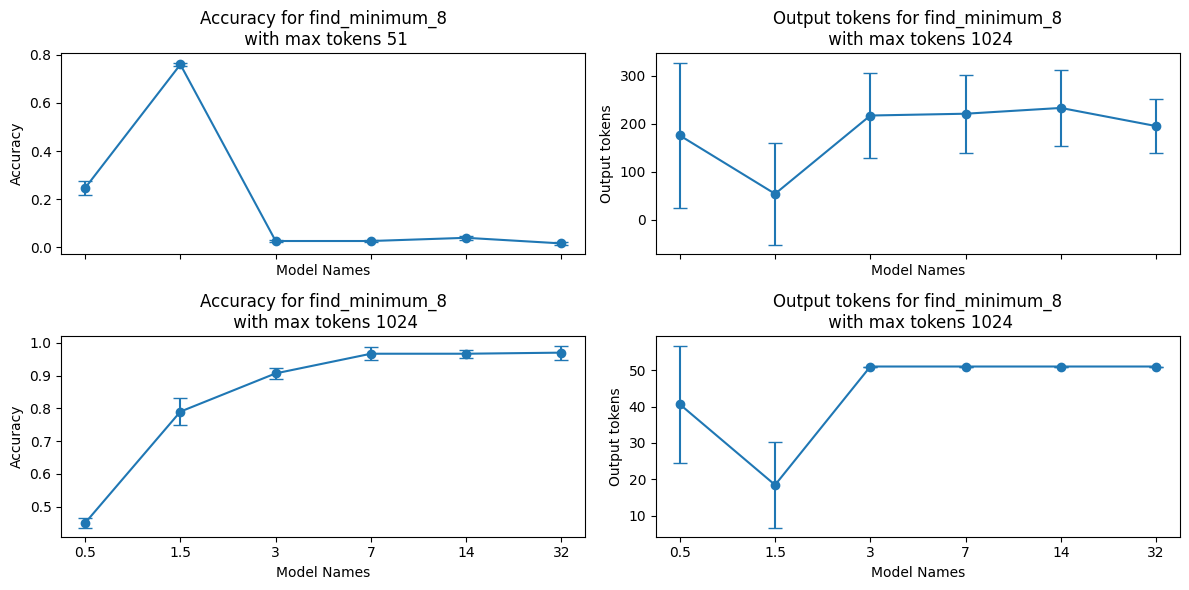

In [14]:
visualize("find_minimum_8",51)

(46.99, 22.23, 60.0, 60.0, 60.0, 60.0)


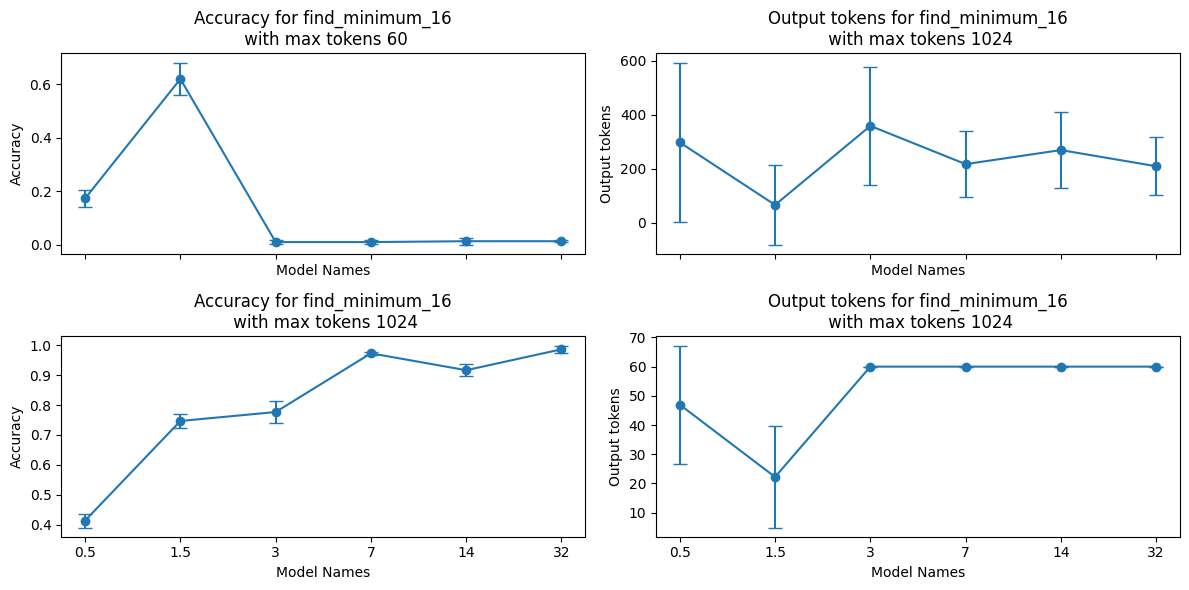

In [15]:
visualize("find_minimum_16",60)

(315.67, 305.94, 317.51, 314.65, 277.92)


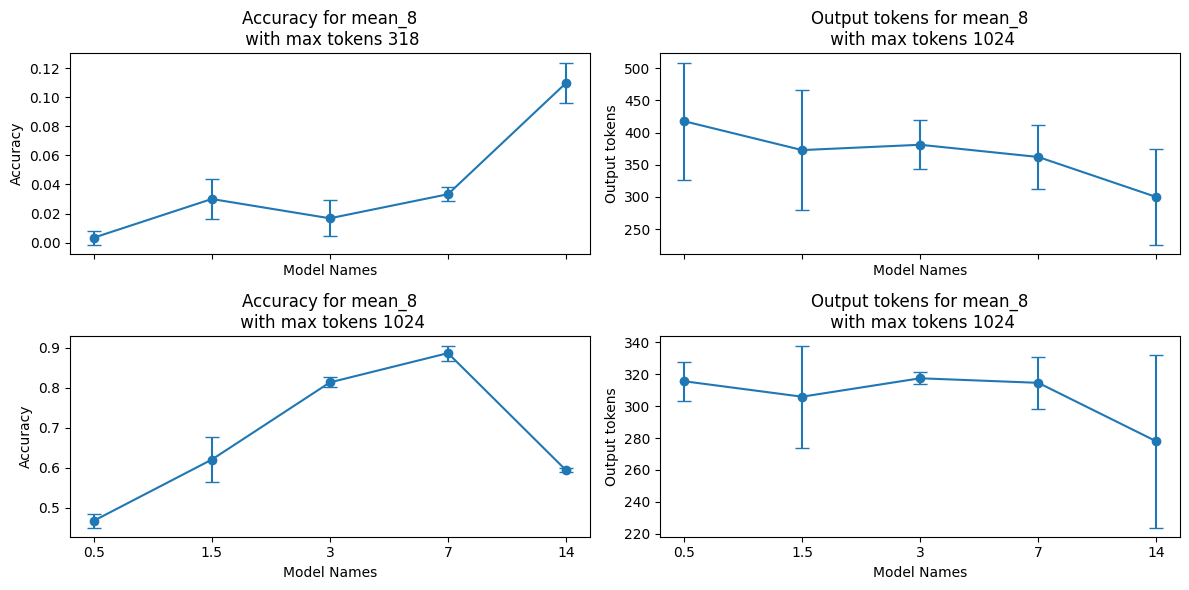

In [16]:
visualize("mean_8",318)

(569.55, 527.62, 556.63, 569.52, 530.31)


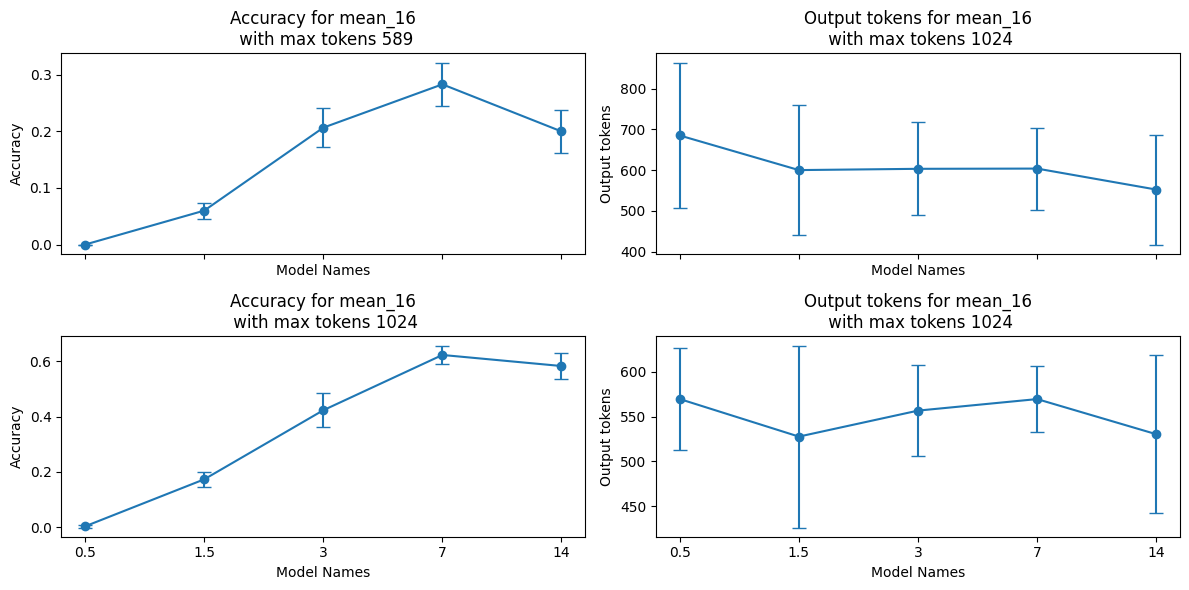

In [17]:
visualize("mean_16",589)

(74.31, 58.72, 79.0, 66.19, 79.0, 78.97)


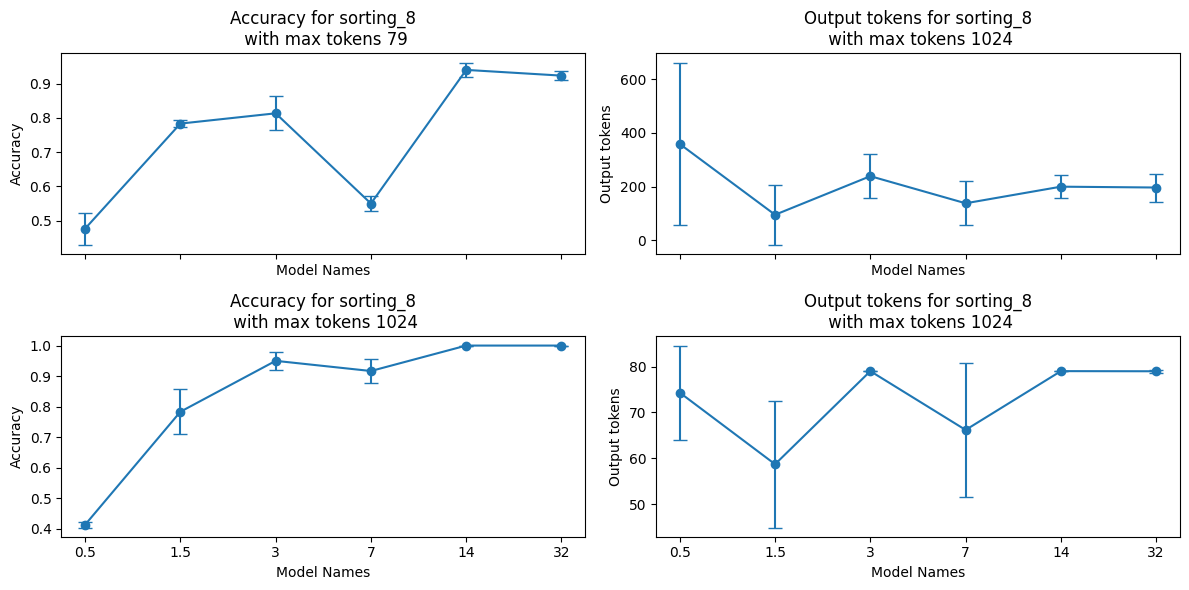

In [18]:
visualize("sorting_8",79)

(156.44, 100.34, 158.84, 122.85, 160.0, 150.29)


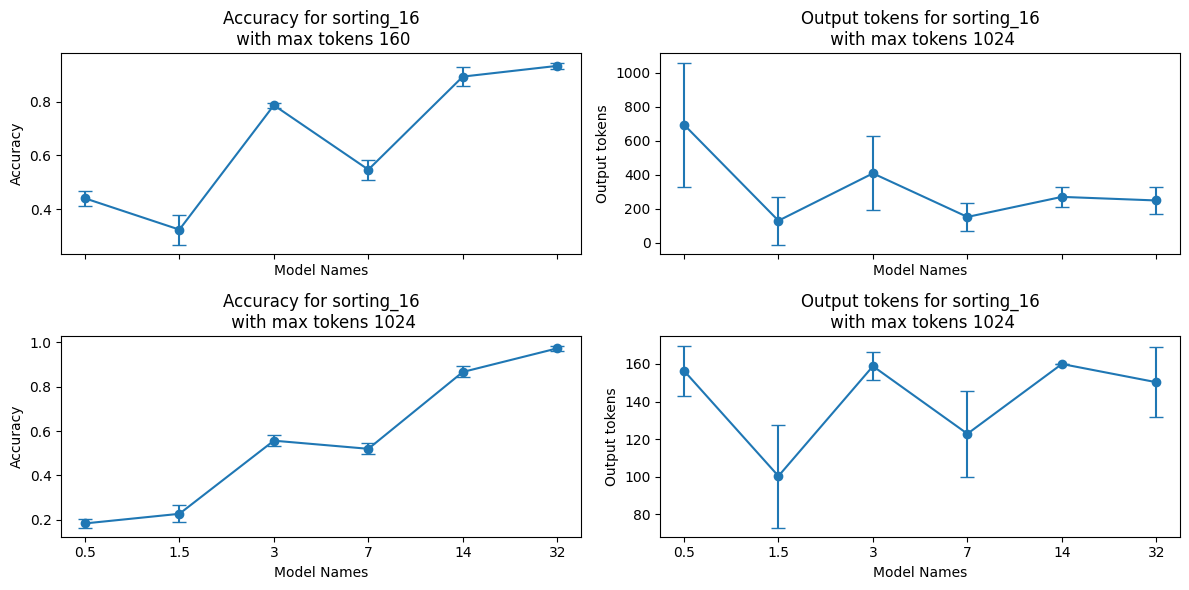

In [19]:
visualize("sorting_16",160)

(80.41, 58.62, 87.48, 55.86, 68.0, 77.98)


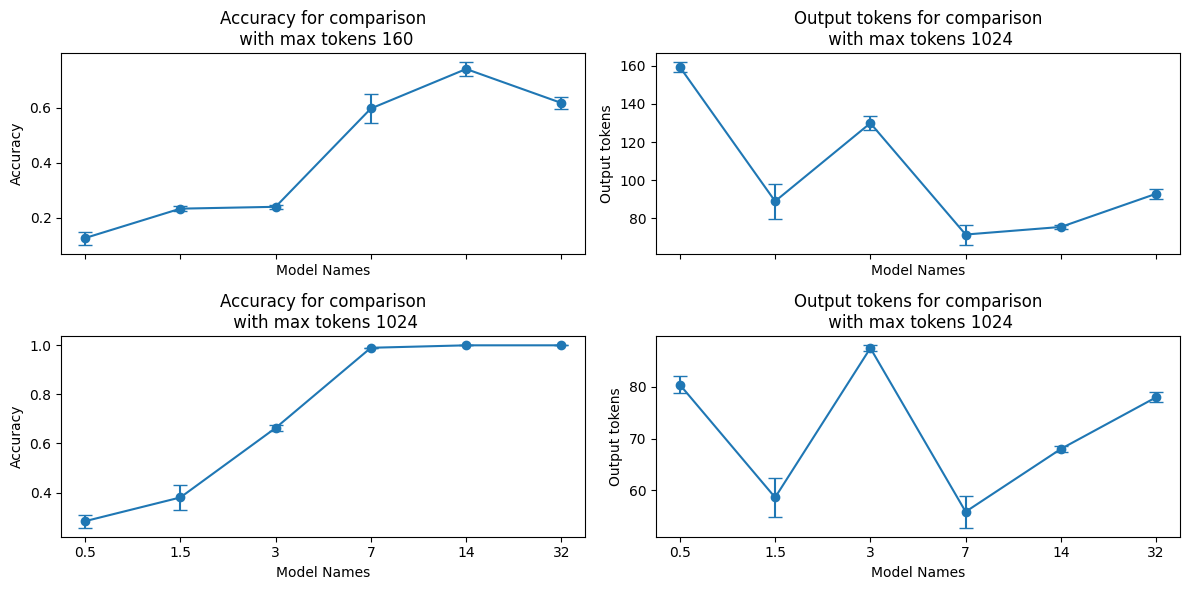

In [20]:
visualize("comparison",160)

## Instruction following vs Output tokens
1. padding

In [16]:
model_names = [
    "0.5B",
    "1.5B",
    "3B",
    "7B",
    "14B",
    "32B"
]
n = len(model_names)
colors = plt.cm.Blues(np.linspace(0.3, 0.9, n))

In [39]:
import matplotlib.pyplot as plt
import os
import re
import json

def plot(task_name):
    model_names = []
    instruction_followed_regular = []
    output_tokens_regular = []

    for model in os.listdir(f"RegularHyperParams/{task_name}"):
        pattern = r"(?<=Qwen2\.5-)([\d.]+)(?=B-Instruct)"
        match = re.search(pattern, model)
        if match:
            model_name = match.group(0)
            model_names.append(model_name)
            
            results_json_regular = json.load(open(os.path.join("RegularHyperParams", task_name, model, "final_report.json")))
            instruction_followed_regular.append(results_json_regular[task_name]["instruction_followed"]["mean"])
            output_tokens_regular.append(results_json_regular[task_name]["output_tokens"]["mean"])
    
    # Sort and extract sizes
    combined = list(zip(model_names, instruction_followed_regular, output_tokens_regular))
    combined_sorted = sorted(combined, key=lambda x: float(x[0]))
    model_names_sorted, instruction_followed_regular_sorted, output_tokens_regular_sorted = zip(*combined_sorted)
    model_sizes = [float(name) for name in model_names_sorted]

    # Normalize bubble sizes between 100 and 1000
    min_size, max_size = min(model_sizes), max(model_sizes)
    bubble_sizes = [
    200 + 800 * (size - min_size) / (max_size - min_size) if max_size > min_size else 600
    for size in model_sizes
    ]
    # print(bubble_sizes)
    
    plt.figure(figsize=(6, 4))
    for i in range(len(model_names_sorted)):
        plt.scatter(output_tokens_regular_sorted[i], instruction_followed_regular_sorted[i],
                    s=bubble_sizes[i], color=colors[i], label=model_names_sorted[i], alpha=0.8)
        
    # Add labels
    for i in range(len(model_names_sorted)):
        plt.text(output_tokens_regular_sorted[i], instruction_followed_regular_sorted[i],
                 model_names_sorted[i] + "B", fontsize=8, ha='center', va='center')
        
    x_min, x_max = min(output_tokens_regular_sorted), max(output_tokens_regular_sorted)
    y_min, y_max = min(instruction_followed_regular_sorted), max(instruction_followed_regular_sorted)
    x_padding = (x_max - x_min) * 0.1
    y_padding = (y_max - y_min) * 0.1

    plt.xlim(x_min - x_padding, x_max + x_padding)
    plt.ylim(y_min - y_padding, y_max + y_padding)

    plt.xlabel("Output Tokens")
    plt.ylabel("Instruction Following %")
    plt.title(f"Output Tokens vs Instruction Following % for {task_name}")
    plt.tight_layout()
    plt.show()

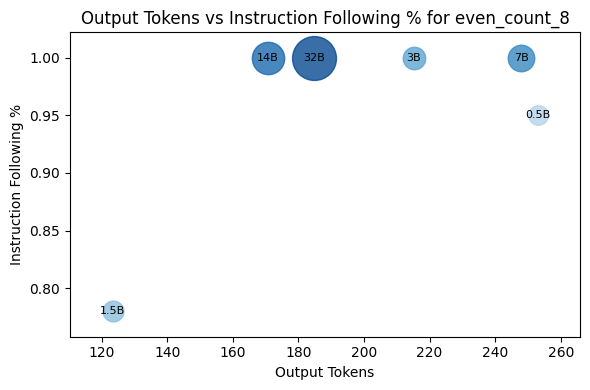

In [40]:
plot("even_count_8")

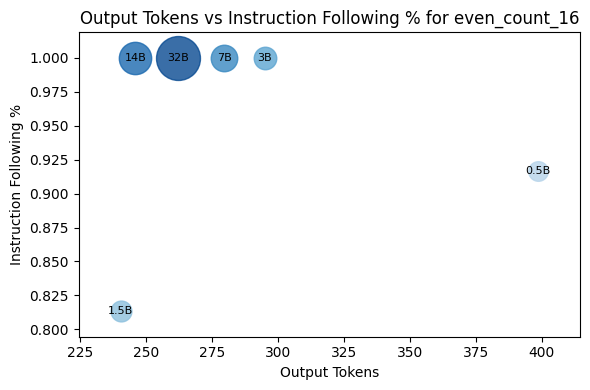

In [41]:
plot("even_count_16")

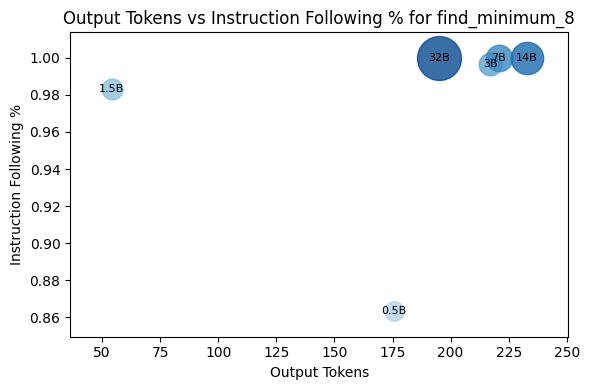

In [42]:
plot("find_minimum_8")

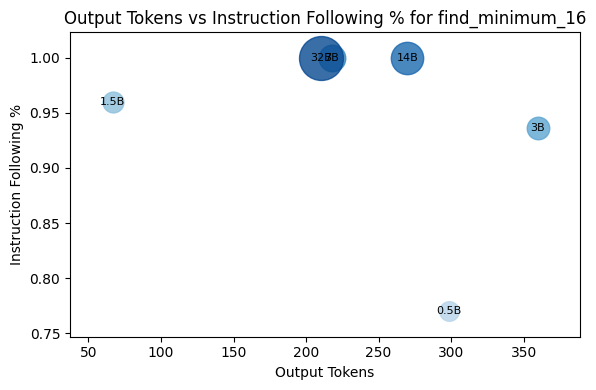

In [43]:
plot("find_minimum_16")

/tmp/ipykernel_2976387/2750179463.py:52: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(y_min - y_padding, y_max + y_padding)


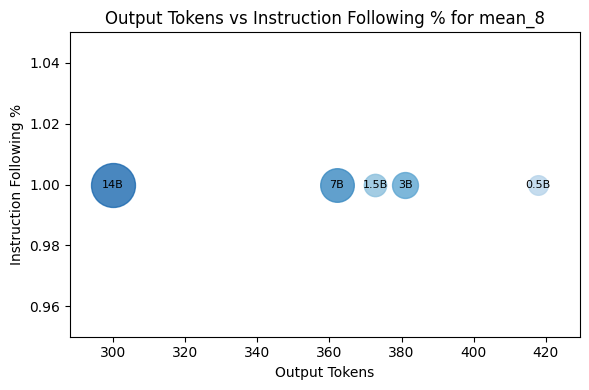

In [44]:
plot("mean_8")

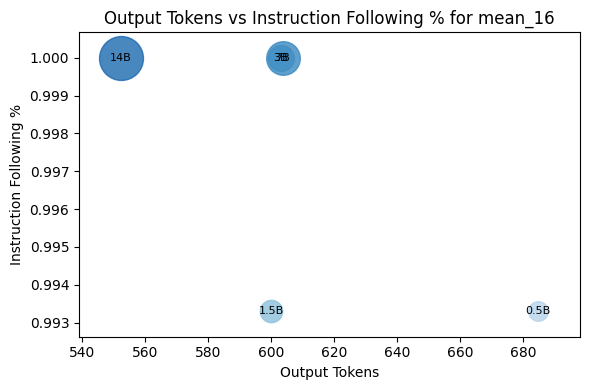

In [45]:
plot("mean_16")

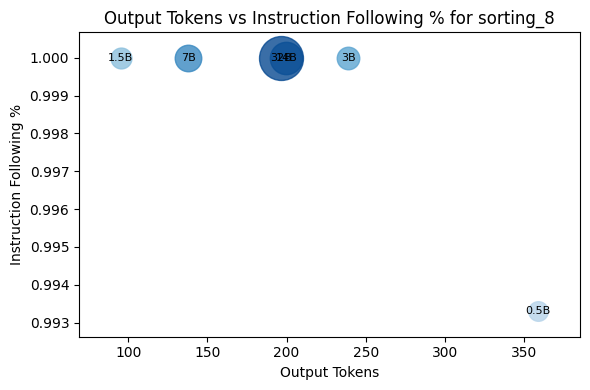

In [46]:
plot("sorting_8")

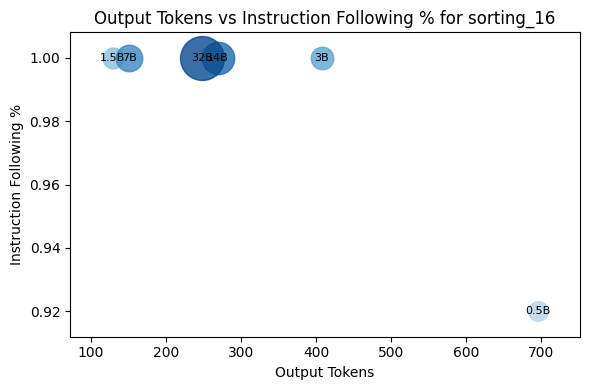

In [47]:
plot("sorting_16")

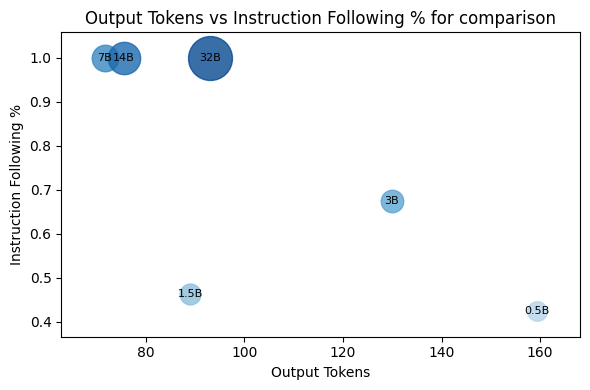

In [48]:
plot("comparison")